## Description of Notebook

The notebook is used to look closer into VDFs and the fields files in order to identify the stable and unstable periods. This notebook is also used to prepare the data for the machine learning (yet without the partitioning of the data into the train and test data sets which will be done separately)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import kineticsim_reader as kr
import pickle
import os
import random
from scipy.signal import savgol_filter
from tqdm import tqdm

## Generation of a VDF converter

Size specification: 40x40

Range specification: -2.5VA:3.5VA for x direction, -3.0VA:3.0VA for y direction

### Simple visualization to understand rebinning (orientation and correctness)

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_A0.5Hepp_beta0.5eps1e-4_256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


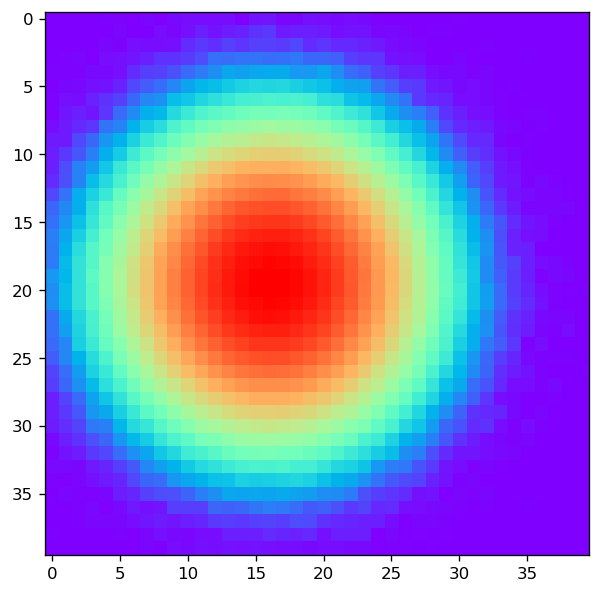

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_A0.75Hepp_beta1_256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


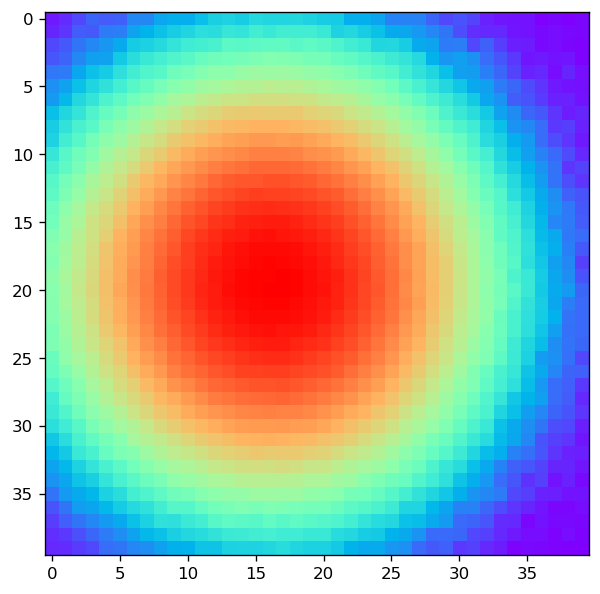

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap3.3Aa2.0Vd0.42
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


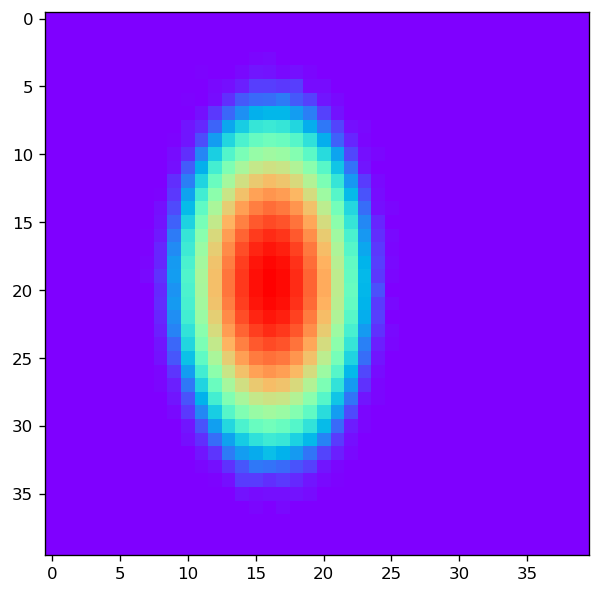

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap4.3Aa1.6
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


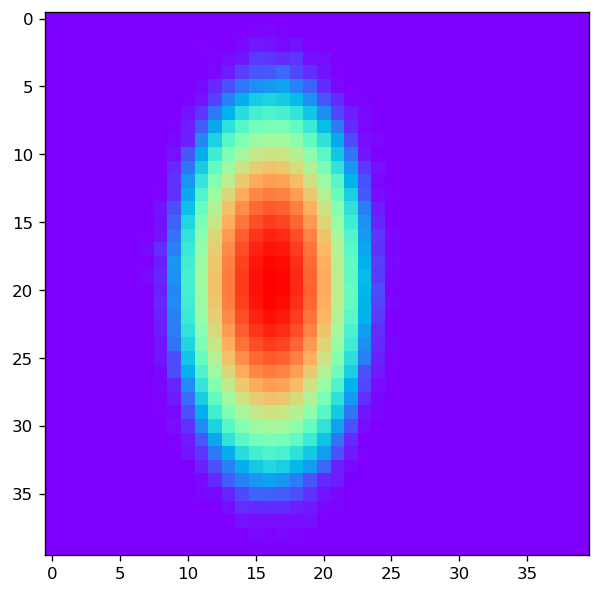

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap4.3Aa1.6Vd0.32
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


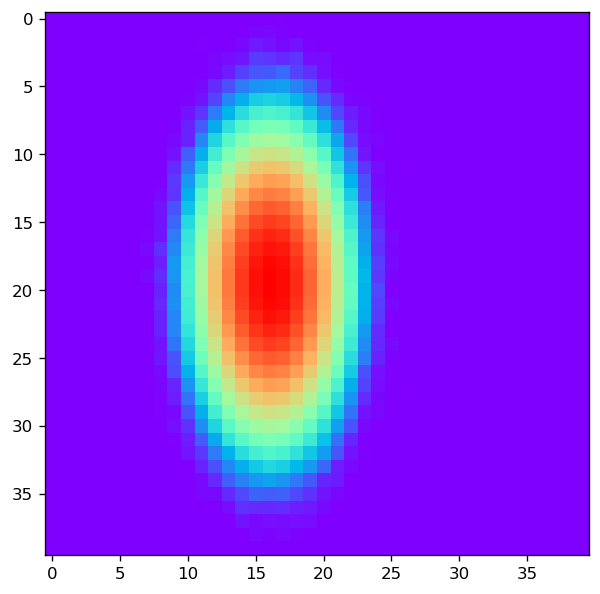

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


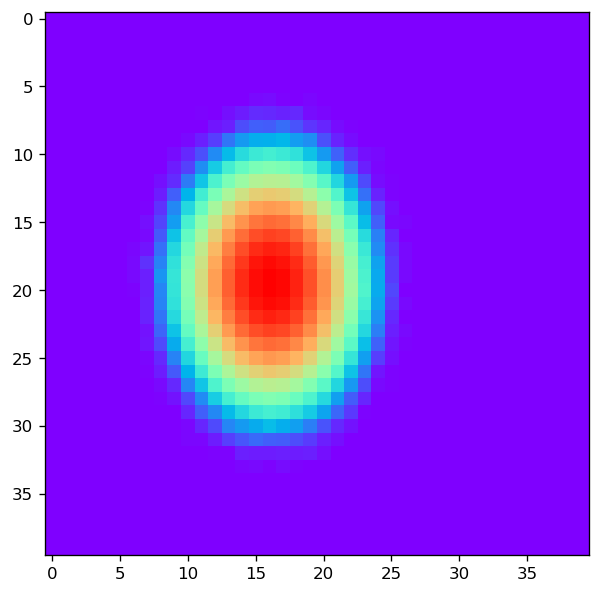

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


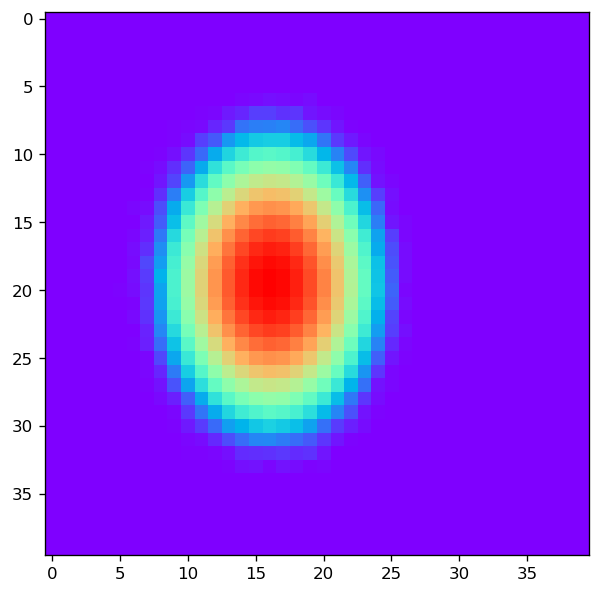

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++A10_256_iden0eps0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


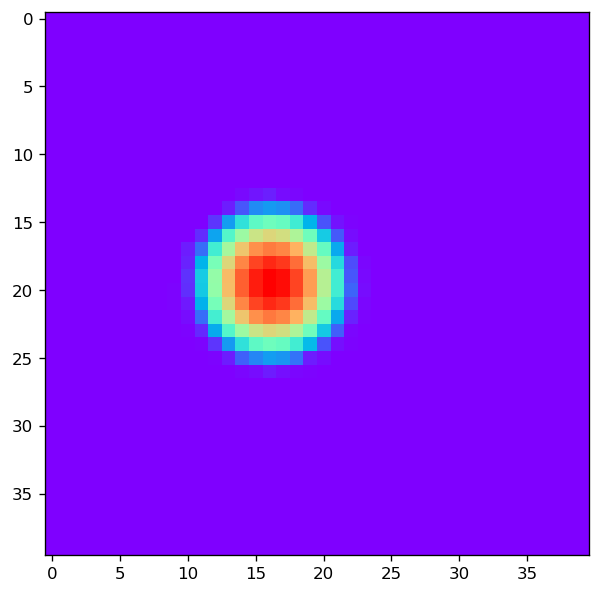

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++v2_256_256ppc_iden3v0m0.5pwr6eps0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


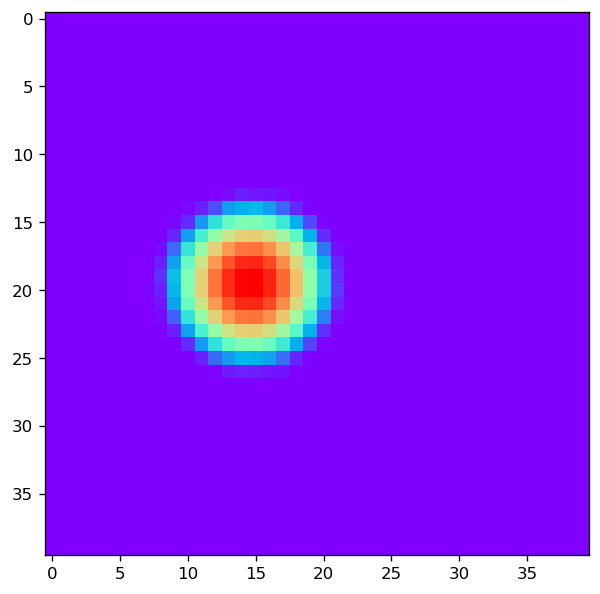

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++v2_256_iden0eps1e-4t600
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


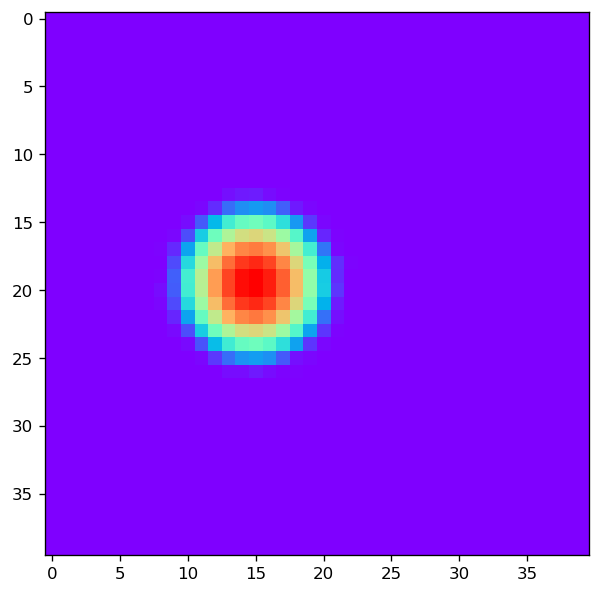

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++vd1.5_256_iden0eps1e-4
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


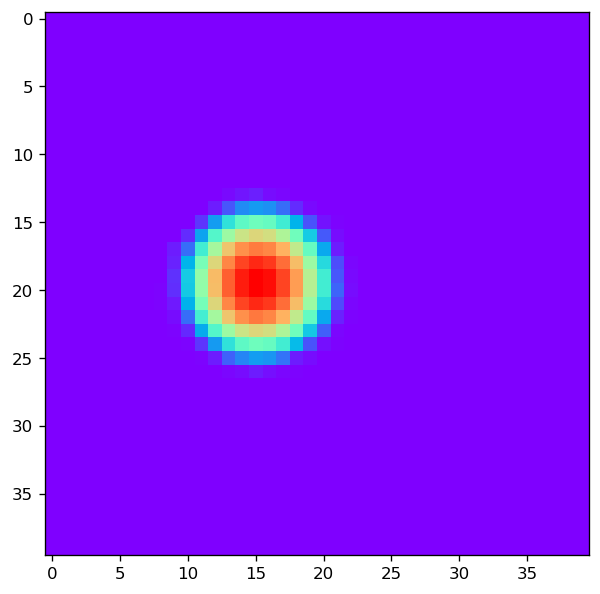

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


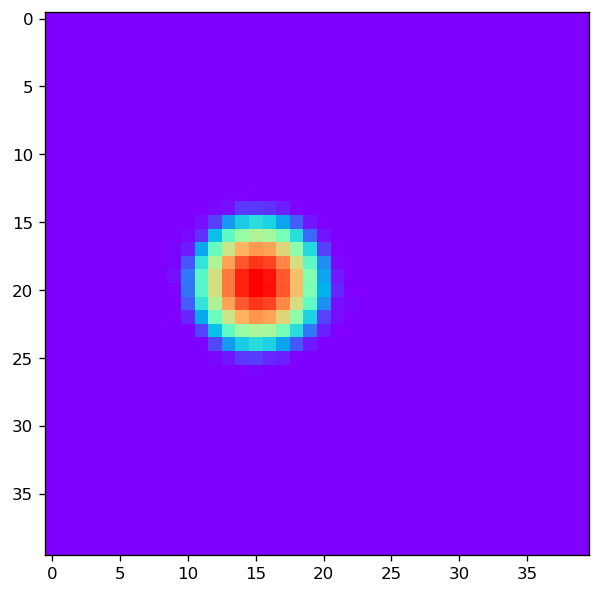

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


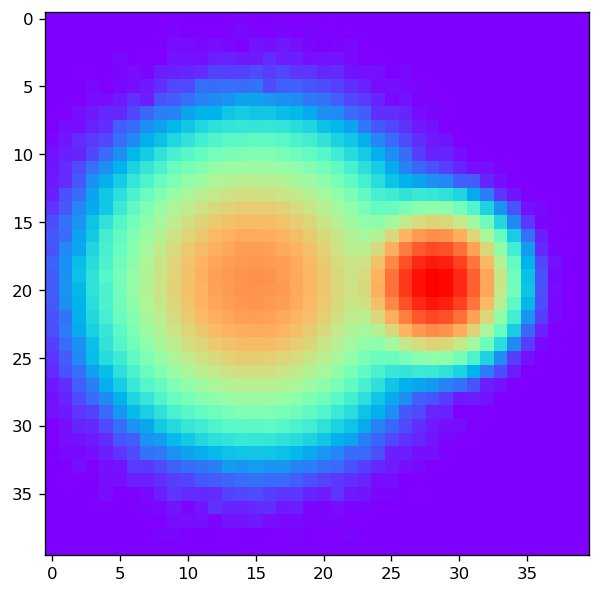

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


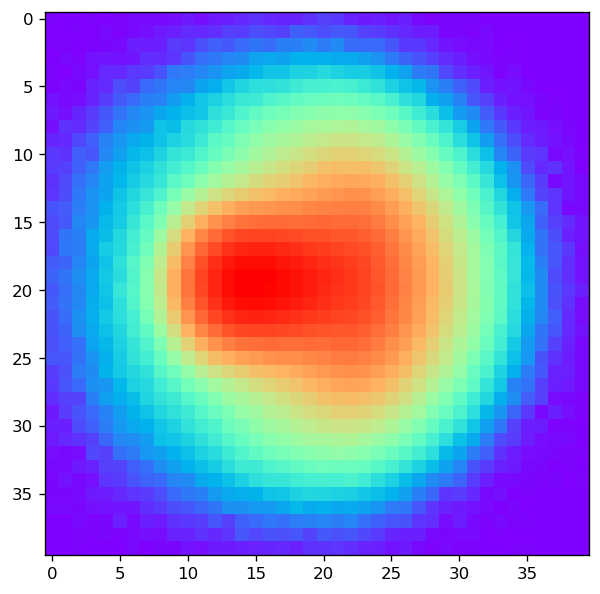

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2av2.3_128x3_iden0eps1e-4_dx0.75
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


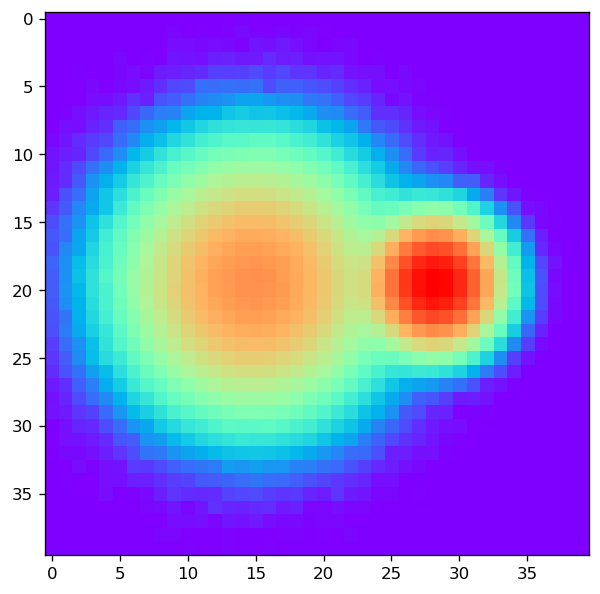

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_vap1.2Ap1Aa0.75_rdna_0.05
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


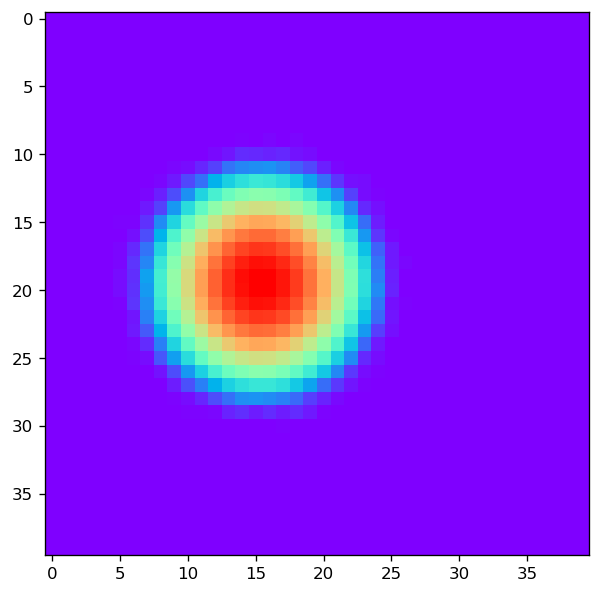

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_vap1.2Ap3.35Aa2.05rdna_0.007
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


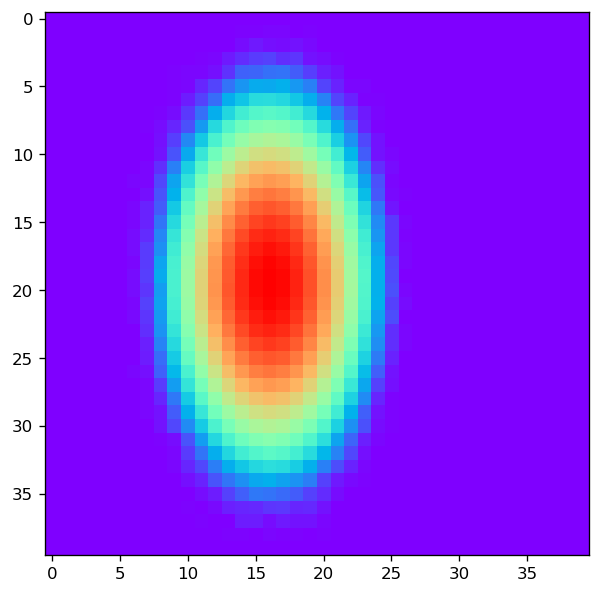

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_vap1.5Ap1.5Aa1rdna_0.007
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


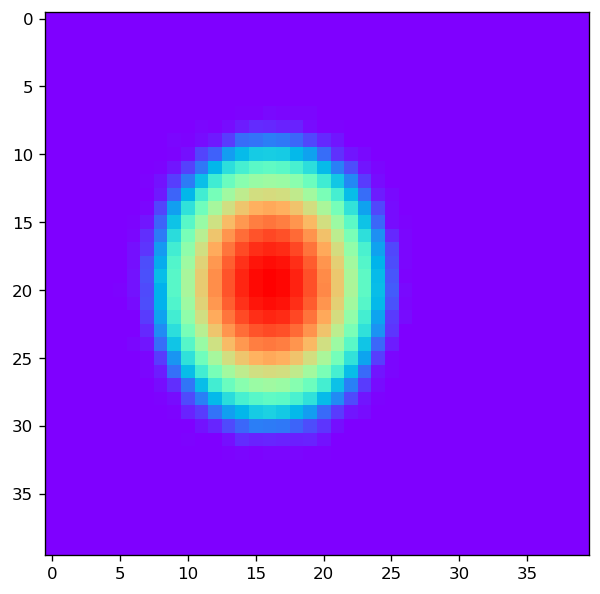

In [11]:
simfiles_spec = ['particles.d11_A0.5Hepp_beta0.5eps1e-4_256',\
                 'particles.d11_A0.75Hepp_beta1_256',\
                 'particles.d11_E11Ap3.3Aa2.0Vd0.42',\
                 'particles.d11_E11Ap4.3Aa1.6',\
                 'particles.d11_E11Ap4.3Aa1.6Vd0.32',\
                 'particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
                 'particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
                 'particles.d11_He++A10_256_iden0eps0',\
                 'particles.d11_He++v2_256_256ppc_iden3v0m0.5pwr6eps0',\
                 'particles.d11_He++v2_256_iden0eps1e-4t600',\
                 'particles.d11_He++vd1.5_256_iden0eps1e-4',\
                 'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
                 'particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75',\
                 'particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000',\
                 'particles.d11_pv2av2.3_128x3_iden0eps1e-4_dx0.75',\
                 'particles.d11_vap1.2Ap1Aa0.75_rdna_0.05',\
                 'particles.d11_vap1.2Ap3.35Aa2.05rdna_0.007',\
                 'particles.d11_vap1.5Ap1.5Aa1rdna_0.007']

for simindex in range (0, 18, 1):

    simfile = simfiles_spec[simindex]
    print("vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv")
    print("-> SIMULATION: "+simfile)
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    # Reading the simulation
    if (simfile == 'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long'):
        vdfp_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfp_array.npy')
        vdfhe_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfhe_array.npy')
        vdfp_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfp_array.npy')
        vdfhe_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfhe_array.npy')
        vdfp_array = np.concatenate((vdfp_array_p1, vdfp_array_p2))
        vdfhe_array = np.concatenate((vdfhe_array_p1, vdfhe_array_p2))
    else:
        vdfp_array = np.load('./processing_results/' + simfile + '.vdfp_array.npy')
        vdfhe_array = np.load('./processing_results/' + simfile + '.vdfhe_array.npy')
    # Converting VDF to 40x40 array
    vdfp_4040 = np.zeros([vdfp_array.shape[0],40,40], dtype=float)
    for t in range (0, vdfp_array.shape[0], 1):
        for i in range (60,300,6):
            for j in range (40,280,6):
                vdfp_4040[t,(i-60)//6,(j-40)//6] = np.mean(vdfp_array[t,i:i+6,j:j+6])
    im, ax = plt.subplots(1, 1, figsize=(6,6), dpi=120)
    ax.imshow(np.log10(vdfp_4040[0,:,:].T+1), cmap='rainbow', interpolation='nearest')
    plt.show()

In [14]:
def prepare_mldata_vdfs(simfile, fieldsfile):
    
    timep_array = np.load('./processing_results/' + simfile + '.timep_array.npy')
    anisotropies_p = np.load('./processing_results/' + simfile + '.anisotropies_p.npy')
    moments_p = np.load('./processing_results/' + simfile + '.moments_p.npy')
    anisotropies_he = np.load('./processing_results/' + simfile + '.anisotropies_he.npy')
    moments_he = np.load('./processing_results/' + simfile + '.moments_he.npy')
    
    # preparing VDFs
    if (simfile == 'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long'):
        vdfp_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfp_array.npy')
        vdfhe_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfhe_array.npy')
        vdfp_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfp_array.npy')
        vdfhe_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfhe_array.npy')
        vdfp_array = np.concatenate((vdfp_array_p1, vdfp_array_p2))
        vdfhe_array = np.concatenate((vdfhe_array_p1, vdfhe_array_p2))
    else:
        vdfp_array = np.load('./processing_results/' + simfile + '.vdfp_array.npy')
        vdfhe_array = np.load('./processing_results/' + simfile + '.vdfhe_array.npy')
    vdfp_4040 = np.zeros([vdfp_array.shape[0],40,40], dtype=float)
    for t in range (0, vdfp_array.shape[0], 1):
        for i in range (60,300,6):
            for j in range (40,280,6):
                vdfp_4040[t,(i-60)//6,(j-40)//6] = np.mean(vdfp_array[t,i:i+6,j:j+6])
    vdfhe_4040 = np.zeros([vdfhe_array.shape[0],40,40], dtype=float)
    for t in range (0, vdfhe_array.shape[0], 1):
        for i in range (60,300,6):
            for j in range (40,280,6):
                vdfhe_4040[t,(i-60)//6,(j-40)//6] = np.mean(vdfhe_array[t,i:i+6,j:j+6])
    
    timep_array_fields = np.load('./processing_results/' + fieldsfile + '.timing.npy')[:,1]
    me_perp = np.load('./processing_results/' + fieldsfile + '.me_perp.npy')
    me_tot = np.load('./processing_results/' + fieldsfile + '.me_tot.npy')
    # applying smoothing to remove a periodic signal
    dtime = timep_array_fields[1] - timep_array_fields[0]
    npoints = int(200/dtime)
    if (npoints % 2 == 0): npoints = npoints + 1
    me_tot = savgol_filter(me_tot - me_tot[0], npoints, 2)
    me_perp = savgol_filter(me_perp, npoints, 2)
    
    # resampling to the timing of the VDFs
    me_tot = np.interp(timep_array,timep_array_fields,me_tot)
    me_perp = np.interp(timep_array,timep_array_fields,me_perp)
    
    # time derivatives (relative)
    dt_anisotropies_p = (anisotropies_p[1:]-anisotropies_p[:-1])/(timep_array[1:]-timep_array[:-1])
    dt_anisotropies_p = 2*(dt_anisotropies_p)/(anisotropies_p[1:]+anisotropies_p[:-1])
    dt_anisotropies_he = (anisotropies_he[1:]-anisotropies_he[:-1])/(timep_array[1:]-timep_array[:-1])
    dt_anisotropies_he = 2*(dt_anisotropies_he)/(anisotropies_he[1:]+anisotropies_he[:-1])
    dt_me_perp = (me_perp[1:]-me_perp[:-1])/(timep_array[1:]-timep_array[:-1])
    dt_me_perp = 2*(dt_me_perp)/(me_perp[1:]+me_perp[:-1])
    dt_me_tot = (me_tot[1:]-me_tot[:-1])/(timep_array[1:]-timep_array[:-1])
    dt_me_tot = 2*(dt_me_tot)/(me_tot[1:]+me_tot[:-1])
    
    featurevector_allvdfs = []
    labels_allvdfs = []
    for i in range (0, len(timep_array)-1, 1):
        subvector = []
        subvector.append(vdfp_4040[i,:,:])
        subvector.append(vdfhe_4040[i,:,:])
        # omitting initial time moments for some simulations
        if ((simfile == 'particles.d11_A0.5Hepp_beta0.5eps1e-4_256') and (timep_array[i] < 200)):
            labels_allvdfs.append(0)
            featurevector_allvdfs.append(subvector)
            continue
        if ((simfile == 'particles.d11_A0.75Hepp_beta1_256') and (timep_array[i] < 200)):
            labels_allvdfs.append(0)
            featurevector_allvdfs.append(subvector)
            continue
        if ((simfile == 'particles.d11_vap1.2Ap1Aa0.75_rdna_0.05') and (timep_array[i] < 200)):
            labels_allvdfs.append(0)
            featurevector_allvdfs.append(subvector)
            continue
        if ((simfile == 'particles.d11_vap1.2Ap3.35Aa2.05rdna_0.007') and (timep_array[i] < 200)):
            labels_allvdfs.append(0)
            featurevector_allvdfs.append(subvector)
            continue
        if ((simfile == 'particles.d11_vap1.5Ap1.5Aa1rdna_0.007') and (timep_array[i] < 200)):
            labels_allvdfs.append(0)
            featurevector_allvdfs.append(subvector)
            continue
        # instability condition
        if ((np.abs(dt_anisotropies_p[i]) > 0.001) or (np.abs(dt_anisotropies_he[i]) > 0.001) \
            or (np.abs(dt_me_perp[i]) > 0.001)):
            labels_allvdfs.append(1)
            featurevector_allvdfs.append(subvector)
        else:
            labels_allvdfs.append(0)
            featurevector_allvdfs.append(subvector)
            
    featurevector_allvdfs = np.array(featurevector_allvdfs, dtype='float')
    labels_allvdfs = np.array(labels_allvdfs, dtype='float')
    return featurevector_allvdfs, labels_allvdfs, timep_array
    
    
simfiles = ['particles.d11_A0.5Hepp_beta0.5eps1e-4_256',\
            'particles.d11_A0.75Hepp_beta1_256',\
            'particles.d11_E11Ap3.3Aa2.0Vd0.42',\
            'particles.d11_E11Ap4.3Aa1.6',\
            'particles.d11_E11Ap4.3Aa1.6Vd0.32',\
            'particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
            'particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
            'particles.d11_He++A10_256_iden0eps0',\
            'particles.d11_He++v2_256_iden0eps1e-4t600',\
            'particles.d11_He++vd1.5_256_iden0eps1e-4',\
            'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
            'particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75',\
            'particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000',\
            'particles.d11_pv2av2.3_128x3_iden0eps1e-4_dx0.75',\
            'particles.d11_vap1.2Ap1Aa0.75_rdna_0.05',\
            'particles.d11_vap1.2Ap3.35Aa2.05rdna_0.007',\
            'particles.d11_vap1.5Ap1.5Aa1rdna_0.007']

fldfiles = ['fields.d10_A0.5Hepp_beta0.5eps1e-4_256',\
            'fields.d10_A0.75Hepp_beta1_256',\
            'fields.d10_E11Ap3.3Aa2.0Vd0.42',\
            'fields.d10_E11Ap4.3Aa1.6',\
            'fields.d10_E11Ap4.3Aa1.6Vd0.32',\
            'fields.d10_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
            'fields.d10_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
            'fields.d10_He++A10_256_iden0eps0',\
            'fields.d10_He++v2_256_iden0eps1e-4t600',\
            'fields.d10_He++vd1.5_256_iden0eps1e-4',\
            'fields.d10_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
            'fields.d10_pv2a_128x3_iden0eps1e-4_dx0.75',\
            'fields.d10_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000',\
            'fields.d10_pv2av2.3_128x3_iden0eps1e-4_dx0.75',\
            'fields.d10_vap1.2Ap1Aa0.75_rdna_0.05',\
            'fields.d10_vap1.2Ap3.35Aa2.05rdna_0.007',\
            'fields.d10_vap1.5Ap1.5Aa1rdna_0.007']

featurevector_allvdfs, labels_allvdfs, timep_array = prepare_mldata_vdfs(simfiles[0], fldfiles[0])
print("ML data for the simulation " + simfiles[0] + " generated")
print("Number of data points: " + str(len(labels_allvdfs)))
featurevector_allvdfs_all = np.copy(featurevector_allvdfs)
labels_allvdfs_all = np.copy(labels_allvdfs)
timep_array_all = np.copy(timep_array)
np.save('./mldata_vdfs_40_40/'+simfiles[0]+'.mldata_vdfs.npy', featurevector_allvdfs)
np.save('./mldata_vdfs_40_40/'+simfiles[0]+'.mldata_labels.npy', labels_allvdfs)
np.save('./mldata_vdfs_40_40/'+simfiles[0]+'.mldata_timep.npy', timep_array)

for i in range (1, 17, 1):
    featurevector_allvdfs, labels_allvdfs, timep_array = prepare_mldata_vdfs(simfiles[i], fldfiles[i])
    print("ML data for the simulation " + simfiles[i] + " generated")
    print("Number of data points: " + str(len(labels_allvdfs)))
    np.save('./mldata_vdfs_40_40/'+simfiles[i]+'.mldata_vdfs.npy', featurevector_allvdfs)
    np.save('./mldata_vdfs_40_40/'+simfiles[i]+'.mldata_labels.npy', labels_allvdfs)
    np.save('./mldata_vdfs_40_40/'+simfiles[i]+'.mldata_timep.npy', timep_array)
    featurevector_allvdfs_all = np.concatenate((featurevector_allvdfs_all, featurevector_allvdfs))
    labels_allvdfs_all = np.concatenate((labels_allvdfs_all, labels_allvdfs))
    timep_array_all = np.concatenate((timep_array_all, timep_array))
    
np.save('./mldata_vdfs_40_40/allsimulations.mldata_vdfs_4040.npy', featurevector_allvdfs_all)
np.save('./mldata_vdfs_40_40/allsimulations.mldata_labels_4040.npy', labels_allvdfs_all)
np.save('./mldata_vdfs_40_40/allsimulations.mldata_timep_4040.npy', timep_array_all)

ML data for the simulation particles.d11_A0.5Hepp_beta0.5eps1e-4_256 generated
Number of data points: 80
ML data for the simulation particles.d11_A0.75Hepp_beta1_256 generated
Number of data points: 48
ML data for the simulation particles.d11_E11Ap3.3Aa2.0Vd0.42 generated
Number of data points: 48
ML data for the simulation particles.d11_E11Ap4.3Aa1.6 generated
Number of data points: 48
ML data for the simulation particles.d11_E11Ap4.3Aa1.6Vd0.32 generated
Number of data points: 48
ML data for the simulation particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256 generated
Number of data points: 50
ML data for the simulation particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256 generated
Number of data points: 50
ML data for the simulation particles.d11_He++A10_256_iden0eps0 generated
Number of data points: 48
ML data for the simulation particles.d11_He++v2_256_iden0eps1e-4t600 generated
Number of data points: 92
ML data for the simulation particles.d11_He++vd1.5_256_iden0eps1e-4 generated
Number of d

## Generation of a VDF converter #2

Size specification: 60x60

Range specification: -2.5VA:3.5VA for x direction, -3.0VA:3.0VA for y direction

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_A0.5Hepp_beta0.5eps1e-4_256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


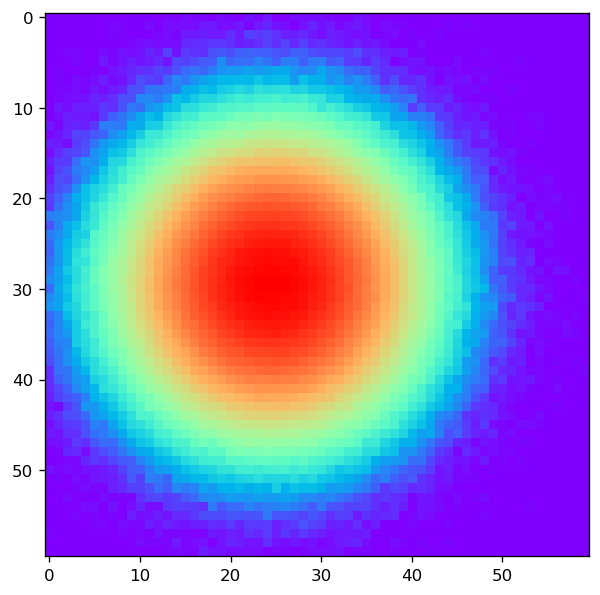

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_A0.75Hepp_beta1_256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


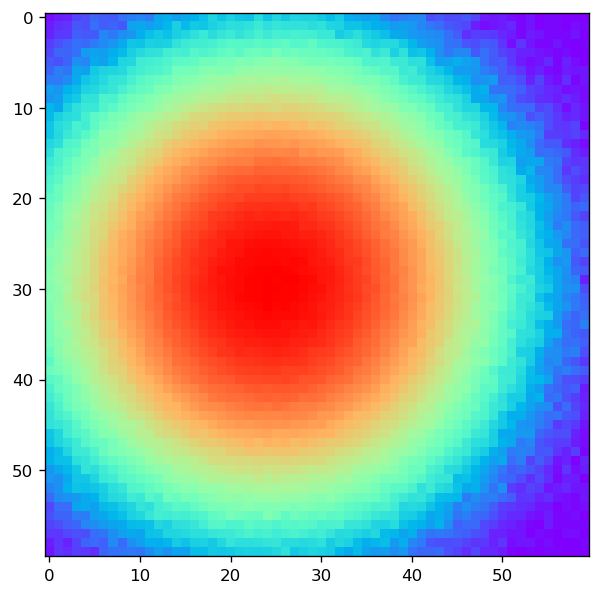

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap3.3Aa2.0Vd0.42
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


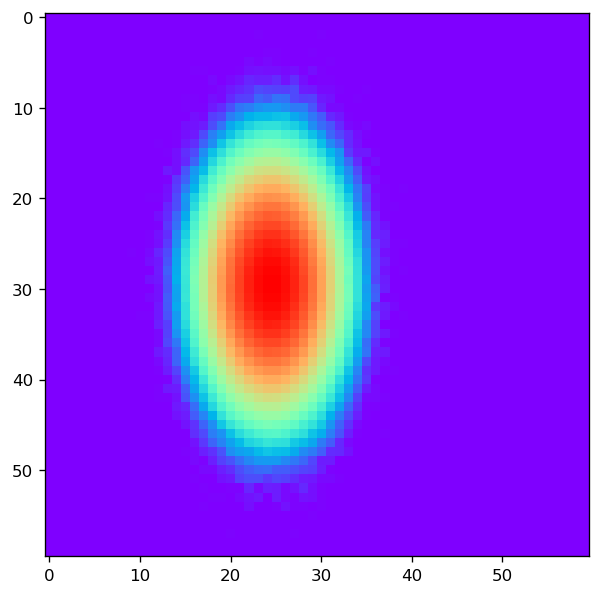

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap4.3Aa1.6
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


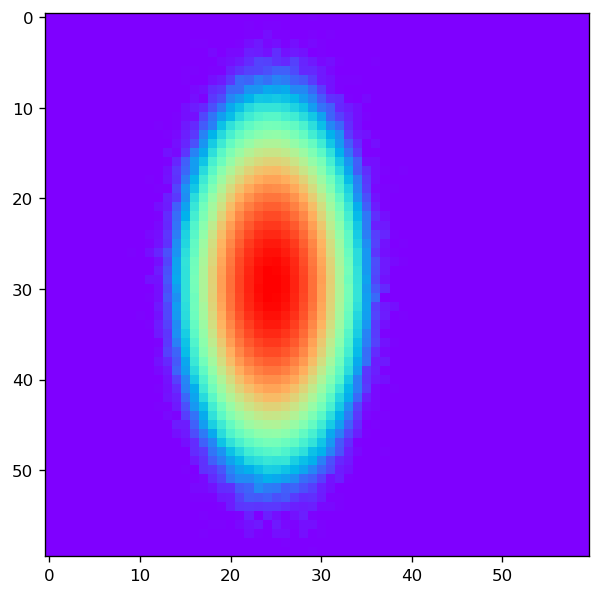

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap4.3Aa1.6Vd0.32
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


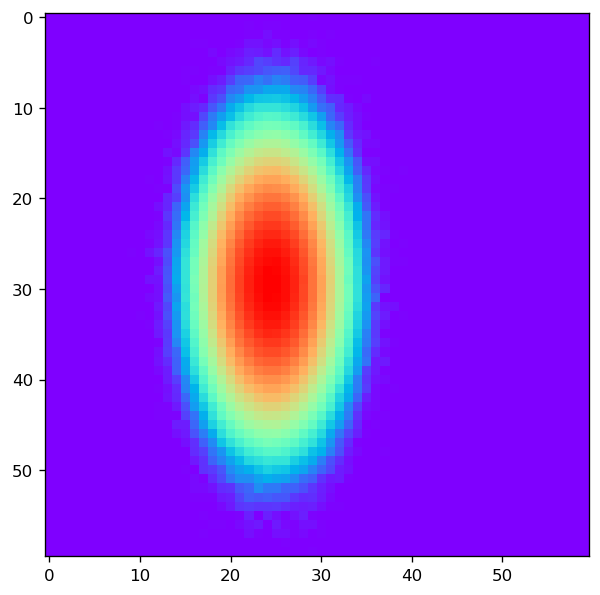

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


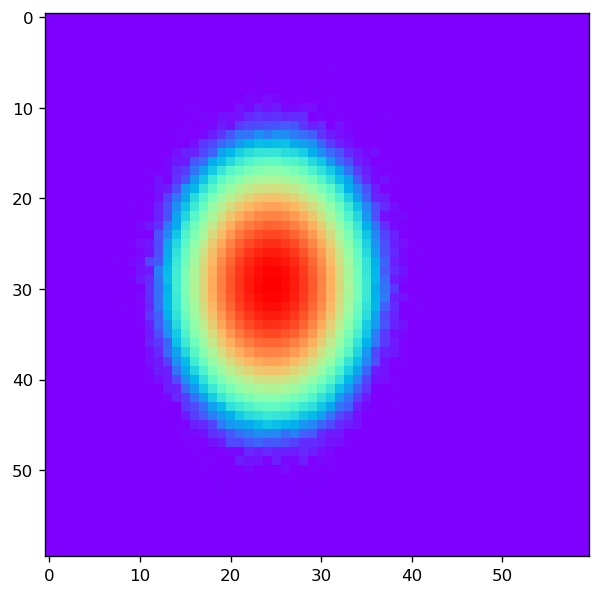

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


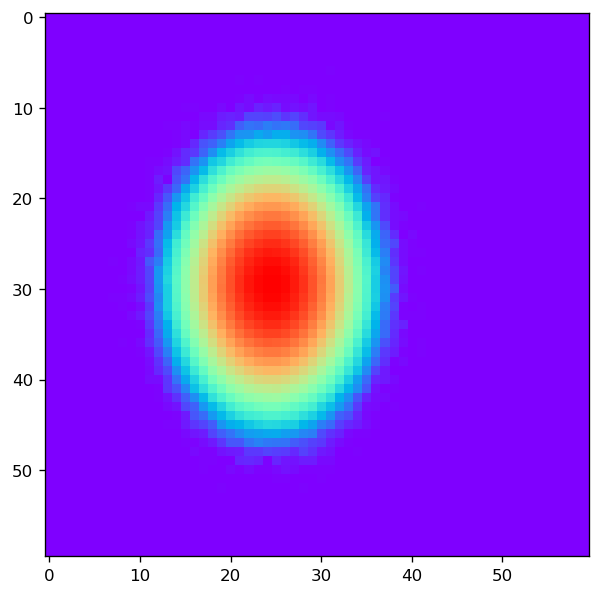

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++A10_256_iden0eps0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


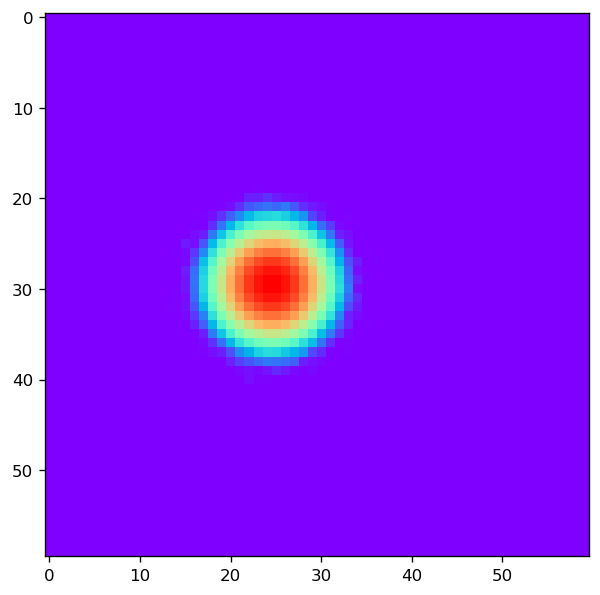

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++v2_256_256ppc_iden3v0m0.5pwr6eps0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


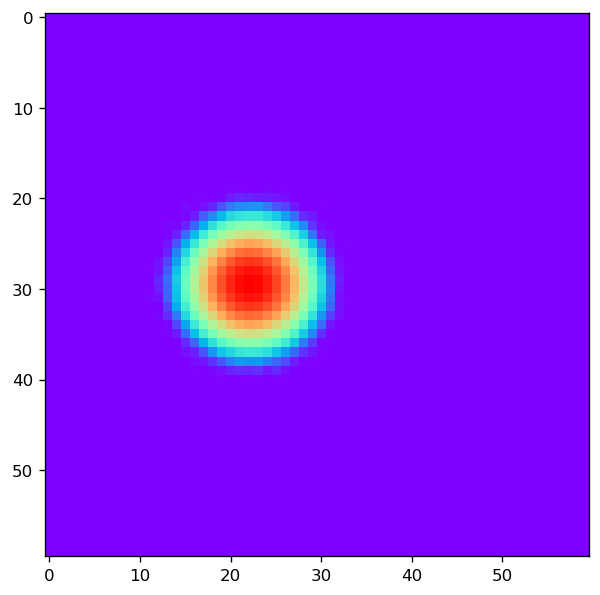

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++v2_256_iden0eps1e-4t600
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


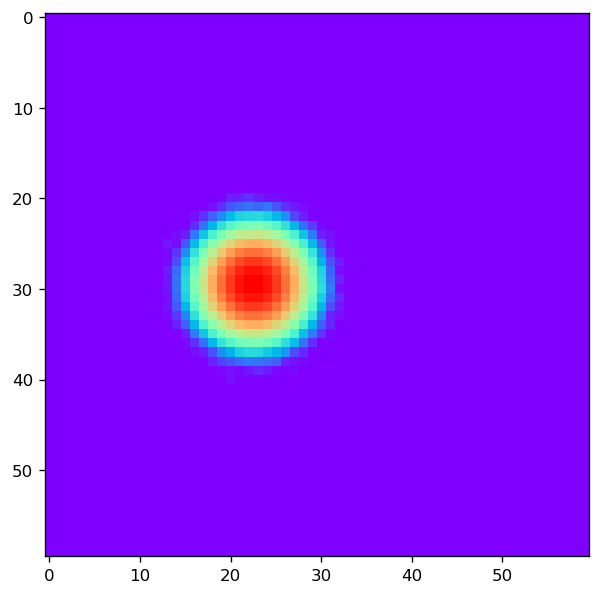

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_He++vd1.5_256_iden0eps1e-4
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


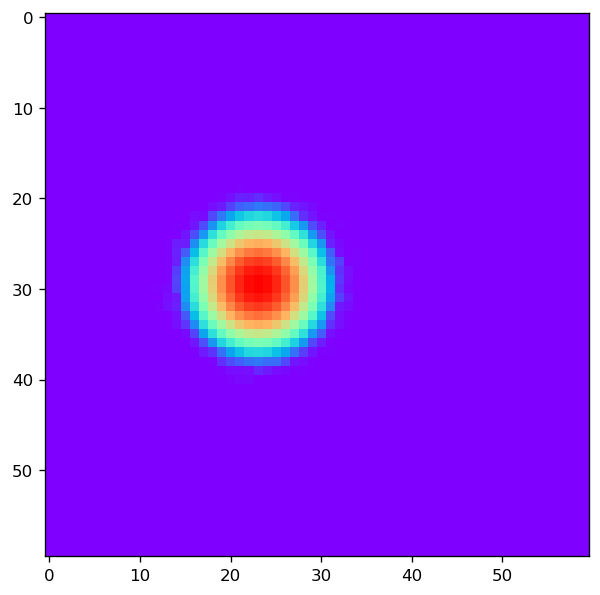

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


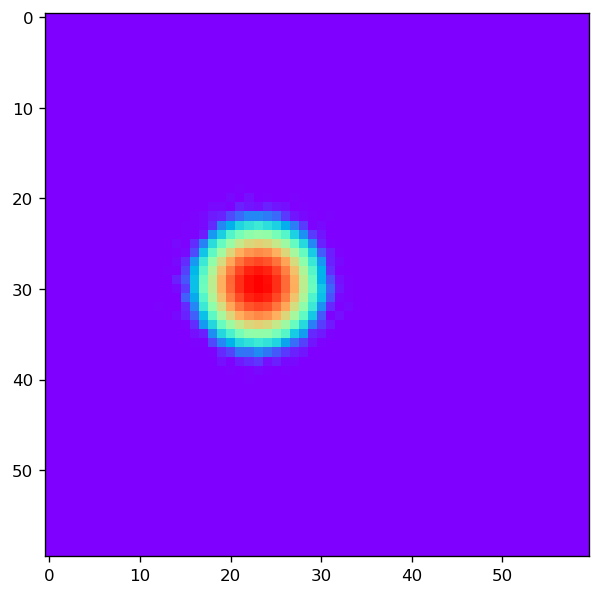

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


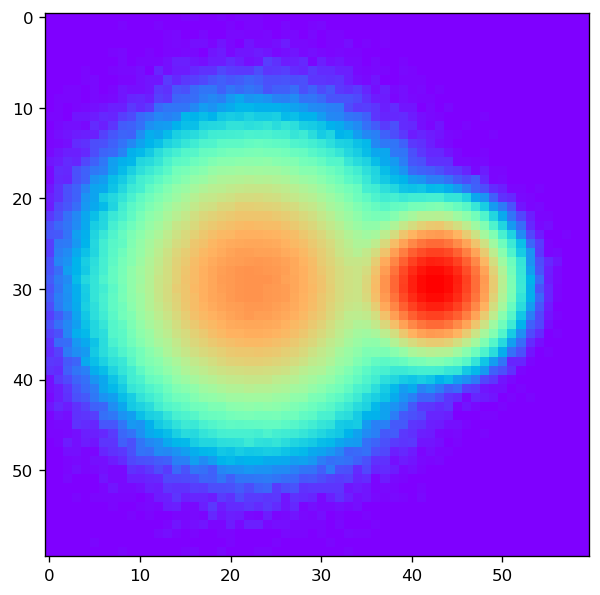

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


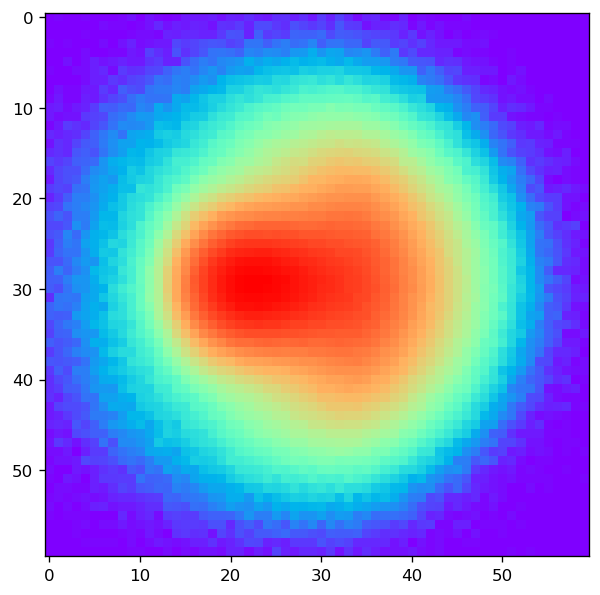

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_pv2av2.3_128x3_iden0eps1e-4_dx0.75
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


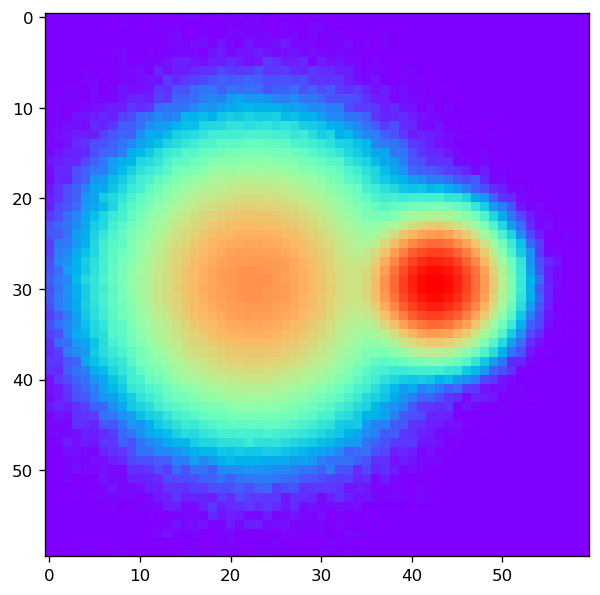

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_vap1.2Ap1Aa0.75_rdna_0.05
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


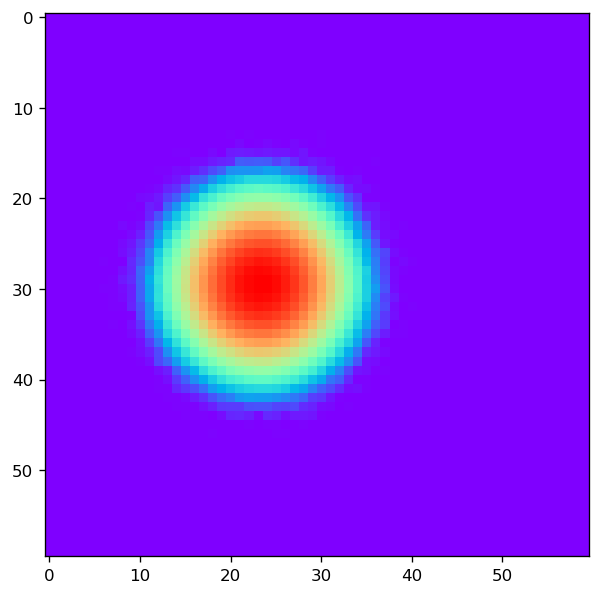

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_vap1.2Ap3.35Aa2.05rdna_0.007
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


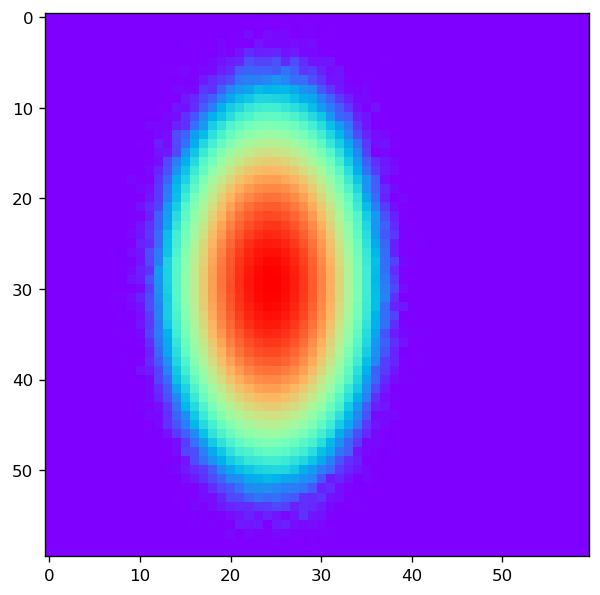

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_vap1.5Ap1.5Aa1rdna_0.007
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


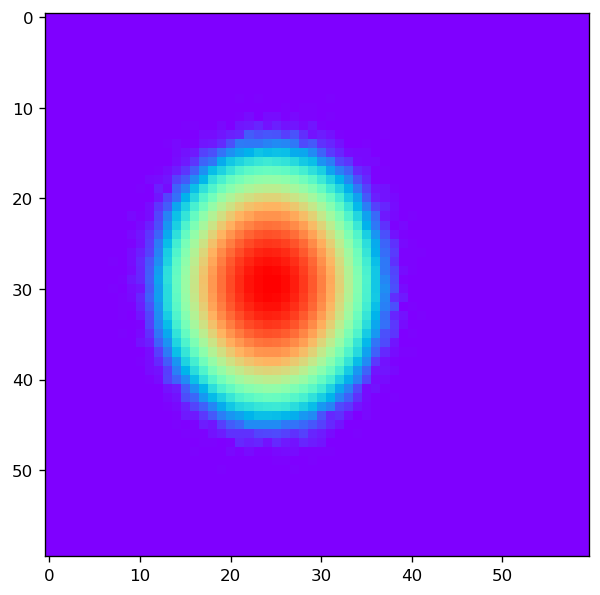

In [3]:
simfiles_spec = ['particles.d11_A0.5Hepp_beta0.5eps1e-4_256',\
                 'particles.d11_A0.75Hepp_beta1_256',\
                 'particles.d11_E11Ap3.3Aa2.0Vd0.42',\
                 'particles.d11_E11Ap4.3Aa1.6',\
                 'particles.d11_E11Ap4.3Aa1.6Vd0.32',\
                 'particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
                 'particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
                 'particles.d11_He++A10_256_iden0eps0',\
                 'particles.d11_He++v2_256_256ppc_iden3v0m0.5pwr6eps0',\
                 'particles.d11_He++v2_256_iden0eps1e-4t600',\
                 'particles.d11_He++vd1.5_256_iden0eps1e-4',\
                 'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
                 'particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75',\
                 'particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000',\
                 'particles.d11_pv2av2.3_128x3_iden0eps1e-4_dx0.75',\
                 'particles.d11_vap1.2Ap1Aa0.75_rdna_0.05',\
                 'particles.d11_vap1.2Ap3.35Aa2.05rdna_0.007',\
                 'particles.d11_vap1.5Ap1.5Aa1rdna_0.007']

for simindex in range (0, 18, 1):

    simfile = simfiles_spec[simindex]
    print("vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv")
    print("-> SIMULATION: "+simfile)
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    # Reading the simulation
    if (simfile == 'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long'):
        vdfp_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfp_array.npy')
        vdfhe_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfhe_array.npy')
        vdfp_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfp_array.npy')
        vdfhe_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfhe_array.npy')
        vdfp_array = np.concatenate((vdfp_array_p1, vdfp_array_p2))
        vdfhe_array = np.concatenate((vdfhe_array_p1, vdfhe_array_p2))
    else:
        vdfp_array = np.load('./processing_results/' + simfile + '.vdfp_array.npy')
        vdfhe_array = np.load('./processing_results/' + simfile + '.vdfhe_array.npy')
    # Converting VDF to 40x40 array
    vdfp_6060 = np.zeros([vdfp_array.shape[0],60,60], dtype=float)
    for t in range (0, vdfp_array.shape[0], 1):
        for i in range (60,300,4):
            for j in range (40,280,4):
                vdfp_6060[t,(i-60)//4,(j-40)//4] = np.mean(vdfp_array[t,i:i+4,j:j+4])
    im, ax = plt.subplots(1, 1, figsize=(6,6), dpi=120)
    ax.imshow(np.log10(vdfp_6060[0,:,:].T+1), cmap='rainbow', interpolation='nearest')
    plt.show()

In [4]:
def prepare_mldata_vdfs(simfile, fieldsfile):
    
    timep_array = np.load('./processing_results/' + simfile + '.timep_array.npy')
    anisotropies_p = np.load('./processing_results/' + simfile + '.anisotropies_p.npy')
    moments_p = np.load('./processing_results/' + simfile + '.moments_p.npy')
    anisotropies_he = np.load('./processing_results/' + simfile + '.anisotropies_he.npy')
    moments_he = np.load('./processing_results/' + simfile + '.moments_he.npy')
    
    # preparing VDFs
    if (simfile == 'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long'):
        vdfp_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfp_array.npy')
        vdfhe_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfhe_array.npy')
        vdfp_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfp_array.npy')
        vdfhe_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfhe_array.npy')
        vdfp_array = np.concatenate((vdfp_array_p1, vdfp_array_p2))
        vdfhe_array = np.concatenate((vdfhe_array_p1, vdfhe_array_p2))
    else:
        vdfp_array = np.load('./processing_results/' + simfile + '.vdfp_array.npy')
        vdfhe_array = np.load('./processing_results/' + simfile + '.vdfhe_array.npy')
    vdfp_6060 = np.zeros([vdfp_array.shape[0],60,60], dtype=float)
    for t in range (0, vdfp_array.shape[0], 1):
        for i in range (60,300,4):
            for j in range (40,280,4):
                vdfp_6060[t,(i-60)//4,(j-40)//4] = np.mean(vdfp_array[t,i:i+4,j:j+4])
    vdfhe_6060 = np.zeros([vdfhe_array.shape[0],60,60], dtype=float)
    for t in range (0, vdfhe_array.shape[0], 1):
        for i in range (60,300,4):
            for j in range (40,280,4):
                vdfhe_6060[t,(i-60)//4,(j-40)//4] = np.mean(vdfhe_array[t,i:i+4,j:j+4])
    
    timep_array_fields = np.load('./processing_results/' + fieldsfile + '.timing.npy')[:,1]
    me_perp = np.load('./processing_results/' + fieldsfile + '.me_perp.npy')
    me_tot = np.load('./processing_results/' + fieldsfile + '.me_tot.npy')
    # applying smoothing to remove a periodic signal
    dtime = timep_array_fields[1] - timep_array_fields[0]
    npoints = int(200/dtime)
    if (npoints % 2 == 0): npoints = npoints + 1
    me_tot = savgol_filter(me_tot - me_tot[0], npoints, 2)
    me_perp = savgol_filter(me_perp, npoints, 2)
    
    # resampling to the timing of the VDFs
    me_tot = np.interp(timep_array,timep_array_fields,me_tot)
    me_perp = np.interp(timep_array,timep_array_fields,me_perp)
    
    # time derivatives (relative)
    dt_anisotropies_p = (anisotropies_p[1:]-anisotropies_p[:-1])/(timep_array[1:]-timep_array[:-1])
    dt_anisotropies_p = 2*(dt_anisotropies_p)/(anisotropies_p[1:]+anisotropies_p[:-1])
    dt_anisotropies_he = (anisotropies_he[1:]-anisotropies_he[:-1])/(timep_array[1:]-timep_array[:-1])
    dt_anisotropies_he = 2*(dt_anisotropies_he)/(anisotropies_he[1:]+anisotropies_he[:-1])
    dt_me_perp = (me_perp[1:]-me_perp[:-1])/(timep_array[1:]-timep_array[:-1])
    dt_me_perp = 2*(dt_me_perp)/(me_perp[1:]+me_perp[:-1])
    dt_me_tot = (me_tot[1:]-me_tot[:-1])/(timep_array[1:]-timep_array[:-1])
    dt_me_tot = 2*(dt_me_tot)/(me_tot[1:]+me_tot[:-1])
    
    featurevector_allvdfs = []
    labels_allvdfs = []
    for i in range (0, len(timep_array)-1, 1):
        subvector = []
        subvector.append(vdfp_6060[i,:,:])
        subvector.append(vdfhe_6060[i,:,:])
        # omitting initial time moments for some simulations
        if ((simfile == 'particles.d11_A0.5Hepp_beta0.5eps1e-4_256') and (timep_array[i] < 200)):
            labels_allvdfs.append(0)
            featurevector_allvdfs.append(subvector)
            continue
        if ((simfile == 'particles.d11_A0.75Hepp_beta1_256') and (timep_array[i] < 200)):
            labels_allvdfs.append(0)
            featurevector_allvdfs.append(subvector)
            continue
        if ((simfile == 'particles.d11_vap1.2Ap1Aa0.75_rdna_0.05') and (timep_array[i] < 200)):
            labels_allvdfs.append(0)
            featurevector_allvdfs.append(subvector)
            continue
        if ((simfile == 'particles.d11_vap1.2Ap3.35Aa2.05rdna_0.007') and (timep_array[i] < 200)):
            labels_allvdfs.append(0)
            featurevector_allvdfs.append(subvector)
            continue
        if ((simfile == 'particles.d11_vap1.5Ap1.5Aa1rdna_0.007') and (timep_array[i] < 200)):
            labels_allvdfs.append(0)
            featurevector_allvdfs.append(subvector)
            continue
        # instability condition
        if ((np.abs(dt_anisotropies_p[i]) > 0.001) or (np.abs(dt_anisotropies_he[i]) > 0.001) \
            or (np.abs(dt_me_perp[i]) > 0.001)):
            labels_allvdfs.append(1)
            featurevector_allvdfs.append(subvector)
        else:
            labels_allvdfs.append(0)
            featurevector_allvdfs.append(subvector)
            
    featurevector_allvdfs = np.array(featurevector_allvdfs, dtype='float')
    labels_allvdfs = np.array(labels_allvdfs, dtype='float')
    return featurevector_allvdfs, labels_allvdfs, timep_array
    
    
simfiles = ['particles.d11_A0.5Hepp_beta0.5eps1e-4_256',\
            'particles.d11_A0.75Hepp_beta1_256',\
            'particles.d11_E11Ap3.3Aa2.0Vd0.42',\
            'particles.d11_E11Ap4.3Aa1.6',\
            'particles.d11_E11Ap4.3Aa1.6Vd0.32',\
            'particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
            'particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
            'particles.d11_He++A10_256_iden0eps0',\
            'particles.d11_He++v2_256_iden0eps1e-4t600',\
            'particles.d11_He++vd1.5_256_iden0eps1e-4',\
            'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
            'particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75',\
            'particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000',\
            'particles.d11_pv2av2.3_128x3_iden0eps1e-4_dx0.75',\
            'particles.d11_vap1.2Ap1Aa0.75_rdna_0.05',\
            'particles.d11_vap1.2Ap3.35Aa2.05rdna_0.007',\
            'particles.d11_vap1.5Ap1.5Aa1rdna_0.007']

fldfiles = ['fields.d10_A0.5Hepp_beta0.5eps1e-4_256',\
            'fields.d10_A0.75Hepp_beta1_256',\
            'fields.d10_E11Ap3.3Aa2.0Vd0.42',\
            'fields.d10_E11Ap4.3Aa1.6',\
            'fields.d10_E11Ap4.3Aa1.6Vd0.32',\
            'fields.d10_E12Ap1.86Aa1.0Vd0.32_256_256x256',\
            'fields.d10_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
            'fields.d10_He++A10_256_iden0eps0',\
            'fields.d10_He++v2_256_iden0eps1e-4t600',\
            'fields.d10_He++vd1.5_256_iden0eps1e-4',\
            'fields.d10_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
            'fields.d10_pv2a_128x3_iden0eps1e-4_dx0.75',\
            'fields.d10_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000',\
            'fields.d10_pv2av2.3_128x3_iden0eps1e-4_dx0.75',\
            'fields.d10_vap1.2Ap1Aa0.75_rdna_0.05',\
            'fields.d10_vap1.2Ap3.35Aa2.05rdna_0.007',\
            'fields.d10_vap1.5Ap1.5Aa1rdna_0.007']

featurevector_allvdfs, labels_allvdfs, timep_array = prepare_mldata_vdfs(simfiles[0], fldfiles[0])
print("ML data for the simulation " + simfiles[0] + " generated")
print("Number of data points: " + str(len(labels_allvdfs)))
featurevector_allvdfs_all = np.copy(featurevector_allvdfs)
labels_allvdfs_all = np.copy(labels_allvdfs)
timep_array_all = np.copy(timep_array)
np.save('./mldata_vdfs_60_60/'+simfiles[0]+'.mldata_vdfs.npy', featurevector_allvdfs)
np.save('./mldata_vdfs_60_60/'+simfiles[0]+'.mldata_labels.npy', labels_allvdfs)
np.save('./mldata_vdfs_60_60/'+simfiles[0]+'.mldata_timep.npy', timep_array)

for i in range (1, 17, 1):
    featurevector_allvdfs, labels_allvdfs, timep_array = prepare_mldata_vdfs(simfiles[i], fldfiles[i])
    print("ML data for the simulation " + simfiles[i] + " generated")
    print("Number of data points: " + str(len(labels_allvdfs)))
    np.save('./mldata_vdfs_60_60/'+simfiles[i]+'.mldata_vdfs.npy', featurevector_allvdfs)
    np.save('./mldata_vdfs_60_60/'+simfiles[i]+'.mldata_labels.npy', labels_allvdfs)
    np.save('./mldata_vdfs_60_60/'+simfiles[i]+'.mldata_timep.npy', timep_array)
    featurevector_allvdfs_all = np.concatenate((featurevector_allvdfs_all, featurevector_allvdfs))
    labels_allvdfs_all = np.concatenate((labels_allvdfs_all, labels_allvdfs))
    timep_array_all = np.concatenate((timep_array_all, timep_array))
    
np.save('./mldata_vdfs_60_60/allsimulations.mldata_vdfs_6060.npy', featurevector_allvdfs_all)
np.save('./mldata_vdfs_60_60/allsimulations.mldata_labels_6060.npy', labels_allvdfs_all)
np.save('./mldata_vdfs_60_60/allsimulations.mldata_timep_6060.npy', timep_array_all)

ML data for the simulation particles.d11_A0.5Hepp_beta0.5eps1e-4_256 generated
Number of data points: 80
ML data for the simulation particles.d11_A0.75Hepp_beta1_256 generated
Number of data points: 48
ML data for the simulation particles.d11_E11Ap3.3Aa2.0Vd0.42 generated
Number of data points: 48
ML data for the simulation particles.d11_E11Ap4.3Aa1.6 generated
Number of data points: 48
ML data for the simulation particles.d11_E11Ap4.3Aa1.6Vd0.32 generated
Number of data points: 48
ML data for the simulation particles.d11_E12Ap1.86Aa1.0Vd0.32_256_256x256 generated
Number of data points: 50
ML data for the simulation particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256 generated
Number of data points: 50
ML data for the simulation particles.d11_He++A10_256_iden0eps0 generated
Number of data points: 48
ML data for the simulation particles.d11_He++v2_256_iden0eps1e-4t600 generated
Number of data points: 92
ML data for the simulation particles.d11_He++vd1.5_256_iden0eps1e-4 generated
Number of d